# Classify Dog Breeds Based On The Transfer Learning 

Project Description : The aim of this project is to use ML to identify different breeds of dogs , this kind of problem called multi-class image classification, we are trying to classify multiple different breeds of dog.

[Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview), will be used as data , it consists of a collection of more than 10K labelled images of different dog breeds

We are going to go trough the following TensorFlow/Deep Leatning workflow:
* Get the data ready 
* Data Preparation (Preprocessing: use TF to turn the data to tensors (Array of numbers that can be run in CPU/GPU) , 3 sets, X&y)
* Choose and fit/train a model ([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)) : Pretrained Model will be used in DL model , this process called transfer learning , we leverage the patterns of another model which has been trained already to classify images
* Evaluatinng the model by making prediction and compare the results with truth labels
* Improve the model trough experimentation (Start with 1K and increase the images)
* Save, Sharing & Reloading the model 

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)


TF version: 2.13.0
Hub version: 0.16.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Checkout the labels of our    training data
import pandas as pd
labels_csv = pd.read_csv("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     ec1b8f7b1a012af943ca2ec8efc58fb8  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

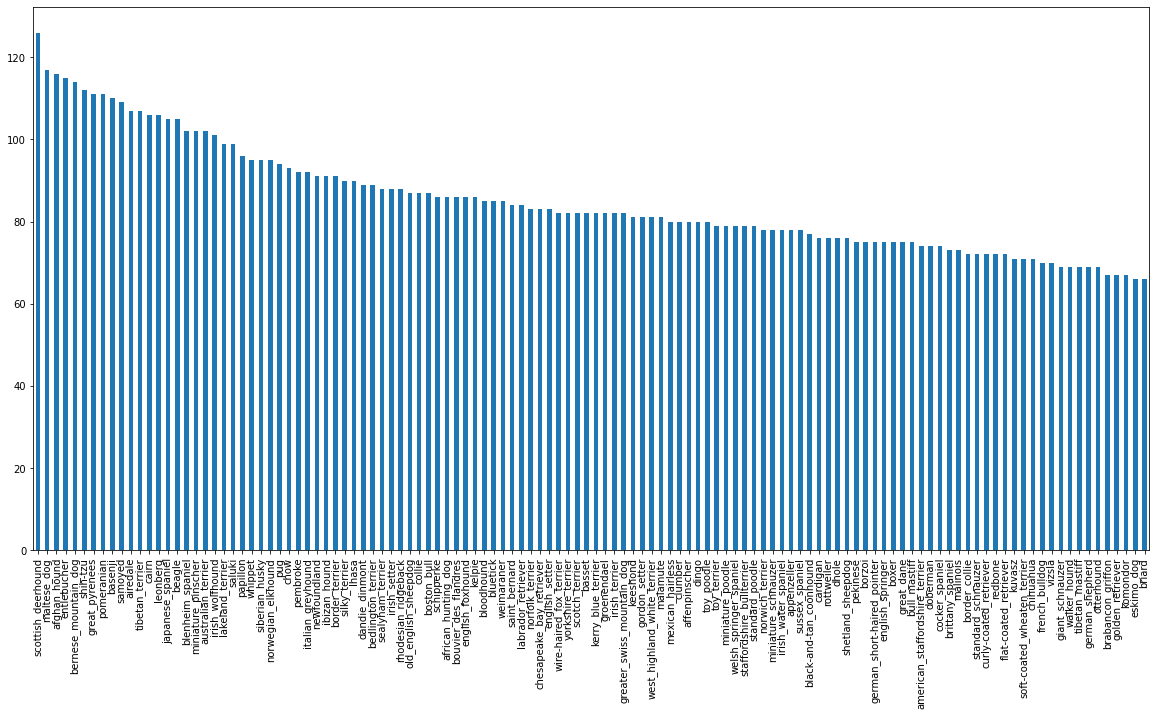

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [5]:
labels_csv.shape

(10222, 2)

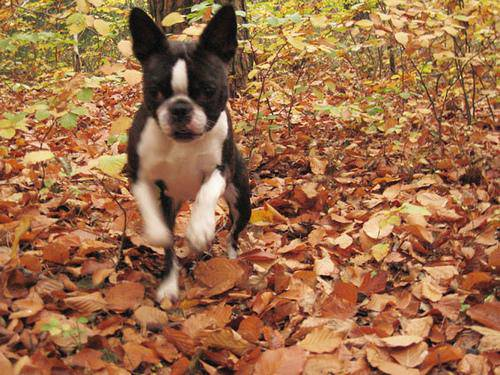

In [6]:
from IPython.display import Image,display


Image("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [7]:
filename=["C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/"+fname+".jpg" for fname in labels_csv["id"]]
filename[:5]

['C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [8]:
filename=["C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/"+fname+".jpg" for fname in labels_csv["id"]]
filename[:10]

['C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/003df8b8a8b05

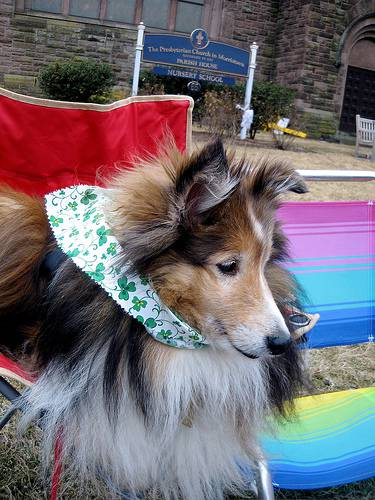

In [9]:
Image(filename[10])

In [10]:
len(labels_csv["breed"].unique()), len(labels_csv["id"].unique())

(120, 10222)

In [11]:
if len(os.listdir("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train"))==len(filename):
    print("The filename match the actual amount of the file")
else:
    print("The filename does not match the actual amount of the file")

The filename match the actual amount of the file


In [12]:
labels=labels_csv["breed"].to_numpy()
len(labels)

10222

In [13]:
if len(labels) == len(filename):
    print("The labels match the actual amount of the file")
else:
    print("The labels does not match the actual amount of the file")

The labels match the actual amount of the file


In [14]:
unique_breeds=np.unique(labels)
unique_breeds.shape


(120,)

In [15]:
print(type(unique_breeds)),

<class 'numpy.ndarray'>


(None,)

In [16]:
print(unique_breeds)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

In [17]:
print(labels[0])
labels[0]==unique_breeds
print(unique_breeds[19])

boston_bull
boston_bull


In [18]:
labels[0]==unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
boolean_label=[label==unique_breeds for label in labels]

In [20]:
#Turn every label into boolean 
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[10221]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
print(labels[0]) #original label
print(boolean_labels[0].argmax()) # index where label occurs in boolean list
print(boolean_labels[0].astype(int)) # 1 for present 0 for not present


boston_bull
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
X=filename
y=boolean_labels

In [23]:
NUM_IMAGES=1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train, y_val =train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [25]:
X_train[:1], y_train[:1]

(['C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/train/00bee065dcec471f26394855c5c2f3de.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fals

In [26]:
#convert image to Numpy array
from matplotlib.pyplot import imread
image=imread(filename[120])
image.shape

(375, 500, 3)

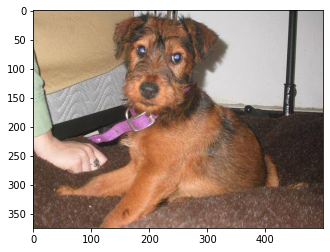

In [27]:
plt.imshow(image) #show(image)


In [28]:
tf.constant(image)[:1,:2]

<tf.Tensor: shape=(1, 2, 3), dtype=uint8, numpy=
array([[[204, 172, 133],
        [203, 171, 132]]], dtype=uint8)>

In [29]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [30]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [31]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [32]:
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [33]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [34]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

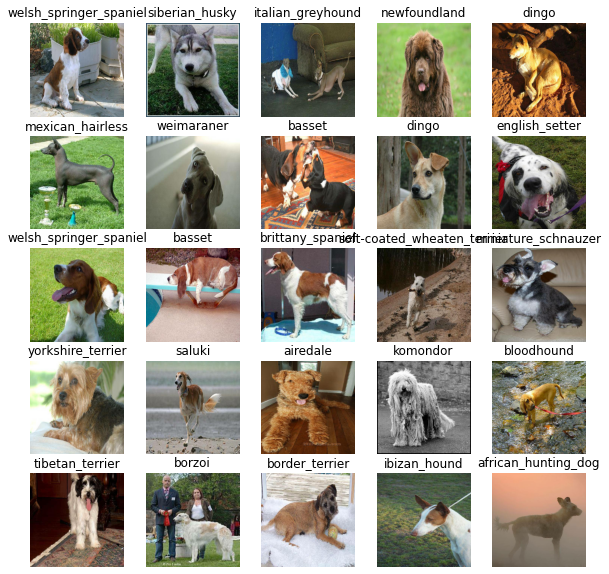

In [35]:
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

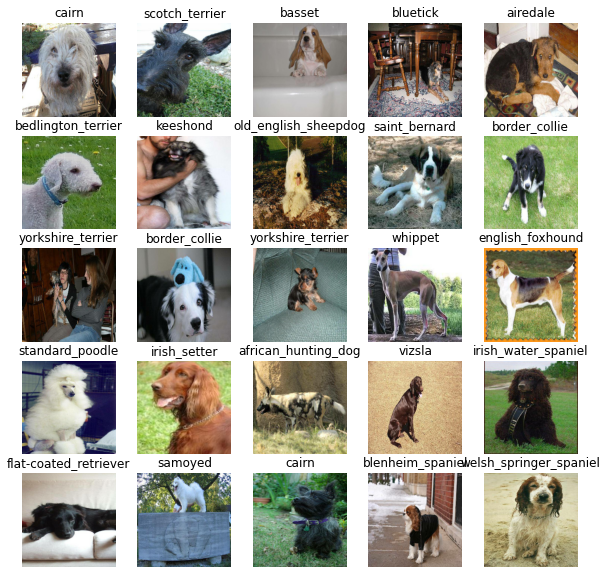

In [36]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [37]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels
OUTPUT_SHAPE= len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [38]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):

  print("Building model with:", MODEL_URL)

  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
  ])

  model.build(input_shape)

  model.summary()

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  return model

In [39]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (

In [40]:
#load the TensorBoard extension
%load_ext tensorboard

In [41]:
import datetime
def create_tensorboard_callback():
  logdir=os.path.join("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
  print(f"Saving TensorBoard log files to: {logdir}")
  return tensorboard_callback

In [42]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [43]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [44]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [45]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________
Saving TensorBoard log files to: C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/logs\20240907-203735
Epoch 1/100
25/25 [==============================] - 58s 2s/step - loss: 4.4611 - accuracy: 0.1287 - val_loss: 3.5449 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================]

In [46]:
%tensorboard --logdir r"C:\Users\pc\Desktop\End-To-End DL Project Dog-Breed-Identification\logs"


Reusing TensorBoard on port 6006 (pid 9728), started 3 days, 0:13:39 ago. (Use '!kill 9728' to kill it.)

In [47]:
#Make prediction on the validation dataset
predictions = model.predict(val_data, verbose=2)
predictions

7/7 - 9s - 9s/epoch - 1s/step


array([[3.25313117e-03, 1.23296573e-04, 1.96610298e-03, ...,
        3.87529959e-03, 3.19101382e-04, 5.75888157e-03],
       [1.22820237e-03, 1.70342647e-03, 2.56412663e-03, ...,
        9.68543871e-04, 1.66956265e-03, 1.76900503e-04],
       [3.30615967e-06, 7.00215460e-05, 5.22614073e-06, ...,
        1.26868299e-05, 7.28865052e-06, 6.69071014e-05],
       ...,
       [4.68910775e-06, 1.70022540e-04, 1.07937245e-04, ...,
        2.74235026e-05, 5.92091783e-05, 2.78479914e-04],
       [2.58419872e-03, 4.04430059e-04, 6.05082423e-05, ...,
        1.49381201e-04, 2.35430445e-04, 2.46897060e-02],
       [1.18167594e-03, 1.64960235e-04, 3.12400120e-03, ...,
        1.32448133e-03, 4.22876910e-04, 8.92516073e-06]], dtype=float32)

In [48]:
predictions.shape

(200, 120)

In [49]:
predictions[0]

array([3.25313117e-03, 1.23296573e-04, 1.96610298e-03, 2.70007167e-05,
       1.09500263e-03, 5.03851334e-05, 4.43557203e-02, 8.13645718e-04,
       1.20027852e-03, 4.31136257e-04, 1.00171322e-03, 1.09281340e-04,
       5.45928313e-04, 1.33130656e-04, 1.79432682e-04, 2.22848161e-04,
       3.28122405e-04, 7.58702159e-02, 4.64223158e-05, 1.09953471e-04,
       1.53305824e-03, 1.99520277e-04, 3.52314964e-05, 1.23412693e-02,
       2.88876909e-04, 1.96325869e-04, 1.37852937e-01, 7.90056249e-04,
       2.59928609e-04, 9.02124972e-04, 4.96231019e-04, 9.86058544e-03,
       2.25786818e-03, 3.94372400e-05, 2.51130608e-04, 1.42367408e-01,
       1.05834035e-04, 3.97838681e-04, 8.75694241e-05, 9.16030767e-05,
       4.41947312e-04, 8.84593610e-05, 7.22156037e-05, 1.42949895e-04,
       1.33532973e-04, 1.71301348e-04, 1.34323316e-04, 1.01681515e-04,
       9.47520166e-05, 6.84509796e-05, 7.28839659e-05, 6.11150390e-05,
       3.37565143e-04, 3.39035032e-04, 1.08891996e-04, 1.54101028e-04,
      

In [50]:
predictions[0]
print(f"Max value (Probability of prediction ): {np.max(predictions[0])}") #Max probability value
print(f"Sum :{np.sum(predictions[0])}") #Sum of predictions
print(f"Max index :{np.argmax(predictions[0])}") #index of max value
print(f"predicted label is :{unique_breeds[np.argmax(predictions[0])]}") #printing the label with max probability

Max value (Probability of prediction ): 0.1423674076795578
Sum :1.0
Max index :35
predicted label is :dandie_dinmont


In [51]:
def get_pred_label(prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]
pred_label=get_pred_label(predictions[0])
pred_label

'dandie_dinmont'

In [52]:
#create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns
  unbatched datasets of images and labels
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [53]:
def plot_pred(prediction_probabilities, labels, image,n=1):
    pred_prob, true_label, image=prediction_probabilities[n], labels[n], image[n]
    pred_label=get_pred_label(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    if pred_label==true_label:
        color="green"
    else:
        color="red"
    plt.grid(False)
    plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100, true_label),color=color)

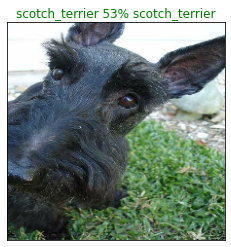

In [54]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, image=val_images)

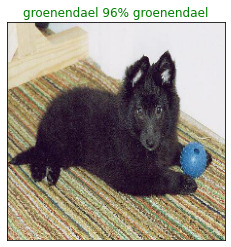

In [55]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, image=val_images, n=77)

In [60]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

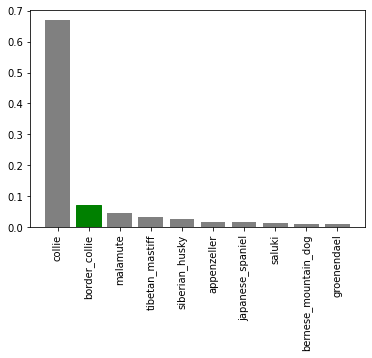

In [61]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

TypeError: plot_pred() got an unexpected keyword argument 'images'

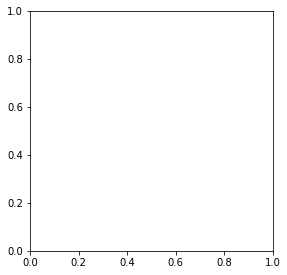

In [66]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [67]:
#Save a model 
def save_model(model, suffix=None):
    """
    Saves a given model in a model directory and appends a suffix (string).
    """"C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model"
    modeldir=os.path.join(, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path=modeldir+"-"+suffix+".h5"
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [69]:
#load model 
def load_model(model_path):
    print(f"Loading saved model from: {model_path}...")
    model = tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    return model    



In [70]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model\20240907-224529-1000-images-mobilenetv2-Adam.h5...


c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model\\20240907-224529-1000-images-mobilenetv2-Adam.h5'

In [71]:
#load a trained model 
load_1000_image_model=load_model("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model/20240907-224529-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model/20240907-224529-1000-images-mobilenetv2-Adam.h5...


In [72]:
#Evaluate the presaved model
model.evaluate(val_data)

7/7 [==============================] - 12s 2s/step - loss: 1.3131 - accuracy: 0.6600


[1.3130548000335693, 0.6600000262260437]

In [73]:
load_1000_image_model.evaluate(val_data)

7/7 [==============================] - 14s 2s/step - loss: 1.3131 - accuracy: 0.6600


[1.3130548000335693, 0.6600000262260437]

In [78]:
## Training q big model with full data
len(X),len(y)

(10222, 10222)

In [79]:
full_data=create_data_batches(X,y)

Creating training data batches...


In [81]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [82]:
#create full model callbacks 
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

Saving TensorBoard log files to: C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/logs\20240907-235000


In [83]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 545s 2s/step - loss: 1.3298 - accuracy: 0.6687
Epoch 2/100
320/320 [==============================] - 481s 2s/step - loss: 0.4004 - accuracy: 0.8832
Epoch 3/100
320/320 [==============================] - 490s 2s/step - loss: 0.2378 - accuracy: 0.9366
Epoch 4/100
320/320 [==============================] - 483s 2s/step - loss: 0.1526 - accuracy: 0.9637
Epoch 5/100
320/320 [==============================] - 398s 1s/step - loss: 0.1052 - accuracy: 0.9802
Epoch 6/100
320/320 [==============================] - 397s 1s/step - loss: 0.0773 - accuracy: 0.9862
Epoch 7/100
320/320 [==============================] - 396s 1s/step - loss: 0.0596 - accuracy: 0.9913
Epoch 8/100
320/320 [==============================] - 408s 1s/step - loss: 0.0458 - accuracy: 0.9947
Epoch 9/100
320/320 [==============================] - 390s 1s/step - loss: 0.0372 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 391s 1s/step - loss: 0.031

In [84]:
save_model(full_model,suffix="full-data-mobilenetv2-Adam")

Saving model to: C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model\20240908-071332-full-data-mobilenetv2-Adam.h5...


c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model\\20240908-071332-full-data-mobilenetv2-Adam.h5'

In [85]:
load_full_model=load_model("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model/20240908-071332-full-data-mobilenetv2-Adam.h5")

Loading saved model from: C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/model/20240908-071332-full-data-mobilenetv2-Adam.h5...


In [76]:
#Making prediction on the test data
#load test image filenames
test_path="C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/"
test_filename=[test_path+i for i in os.listdir(test_path)]
test_filename[:5]

['C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/001a5f3114548acdefa3d4da05474c2e.jpg']

In [77]:
len(test_filename)

10357

In [86]:
test_data=create_data_batches(test_filename,test_data=True)

Creating test data batches...


In [87]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [88]:
#Make prediction on test data using the loaded full model 
test_predictions=load_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 703s 2s/step


In [89]:
np.savetxt("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test-predictions.csv",test_predictions,delimiter=",")

In [90]:
test_predictions=np.loadtxt("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test-predictions.csv",delimiter=",")

In [91]:
test_predictions.shape

(10357, 120)

In [93]:
#Create a pandas DataFrame with empty columns
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))

In [94]:
test_filename[:2]

['C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/test/00102ee9d8eb90812350685311fe5890.jpg']

In [103]:
test_ids=[os.path.splitext(path)[0]  for path in os.listdir(test_path)]
test_ids[:5]
preds_df["id"]=test_ids

In [104]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#add prediction probabilities to each dog bread column
preds_df[list(unique_breeds)]=test_predictions

In [106]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00102ee9d8eb90812350685311fe5890,0.000001,0.000001,0.0,0.0,0.000002,0.0,0.000004,0.000001,0.0,...,0.0,0.000001,0.0,0.000015,0.0,0.0,0.000233,0.0,0.0,0.0
2,0012a730dfa437f5f3613fb75efcd4ce,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001510bc8570bbeee98c8d80c8a95ec1,0.000001,0.0,0.0,0.000003,0.00002,0.000001,0.0,0.0,0.0,...,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.001773,0.0,0.000001
4,001a5f3114548acdefa3d4da05474c2e,0.0001,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
preds_df.to_csv("C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/full_model_pred_submission_1_mobilenetv2.csv",index=False)

## Prediction on Custom images 

In [111]:
#get custom image
custom_path="C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/my-dog-photos/"
custom_image_path=[custom_path +fname for fname in os.listdir(custom_path)]
custom_image_path

['C:/Users/pc/Desktop/End-To-End DL Project Dog-Breed-Identification/my-dog-photos/Togo.jpg']

['Togo.jpg']

In [114]:
custom_data=create_data_batches(custom_image_path,test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [115]:
#Make prediction on the custom data
custom_preds=load_full_model.predict(custom_data,verbose=1)

1/1 [==============================] - 0s 358ms/step


In [117]:
custom_preds.shape

(1, 120)

In [119]:
#get custom image prediction labels
custom_pred_label=get_pred_label(custom_preds)
custom_pred_label

'norwegian_elkhound'

In [120]:
custom_images=[]
for image_path in custom_image_path:
    custom_image=imread(image_path)
    custom_images.append(custom_image)
custom_images

[array([[[181, 198, 218],
         [179, 196, 216],
         [177, 194, 214],
         ...,
         [178, 197, 212],
         [180, 199, 214],
         [177, 196, 211]],
 
        [[181, 198, 218],
         [179, 196, 216],
         [177, 194, 214],
         ...,
         [178, 197, 212],
         [182, 201, 216],
         [181, 200, 215]],
 
        [[181, 198, 218],
         [179, 196, 216],
         [177, 194, 214],
         ...,
         [177, 196, 211],
         [179, 198, 213],
         [177, 196, 211]],
 
        ...,
 
        [[ 60,  62,  75],
         [ 58,  60,  73],
         [ 56,  58,  70],
         ...,
         [ 71,  85,  98],
         [ 62,  76,  89],
         [ 85,  99, 112]],
 
        [[ 59,  61,  74],
         [ 57,  59,  72],
         [ 55,  57,  69],
         ...,
         [ 78,  92, 105],
         [ 60,  74,  87],
         [ 79,  93, 106]],
 
        [[ 58,  60,  73],
         [ 56,  58,  71],
         [ 54,  56,  68],
         ...,
         [ 81,  95, 108],
  

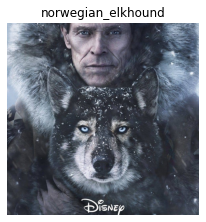

In [121]:
plt.figure(figsize=(12,12))
for n,image in enumerate(custom_images):
    plt.subplot(3,3,n+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(custom_pred_label)